In [63]:
import pandas as pd                  #Data Manipulation library
import seaborn as sns                #Visualization Library (for statistical Visualization)
import matplotlib.pyplot as plt      #Visualization Library
from sklearn.cluster import KMeans   #Cluster library
import warnings
warnings.filterwarnings('ignore')    #importing warnings to avoid the warnings message 

from sklearn.preprocessing import StandardScaler #To scale the data

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate Analysis

In [4]:
df.isnull().sum() #No missing values in Mall Customers dataset

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


As sometimes the latest version or packages are not updated. 
We are importing warnings to avoid the warning messages

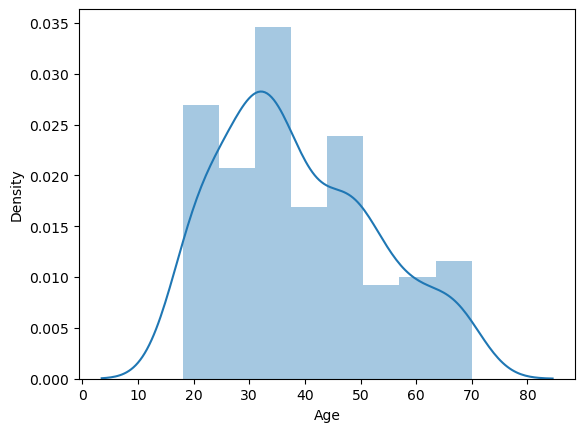

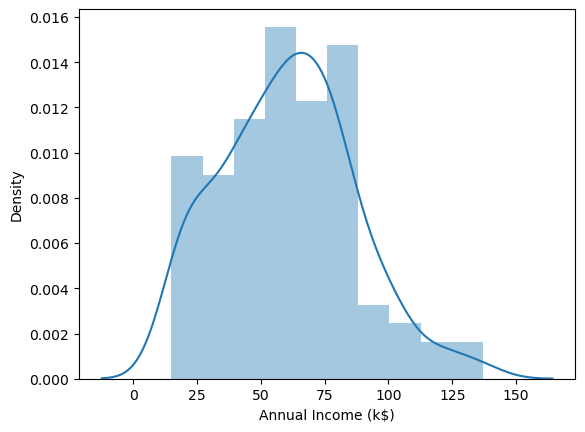

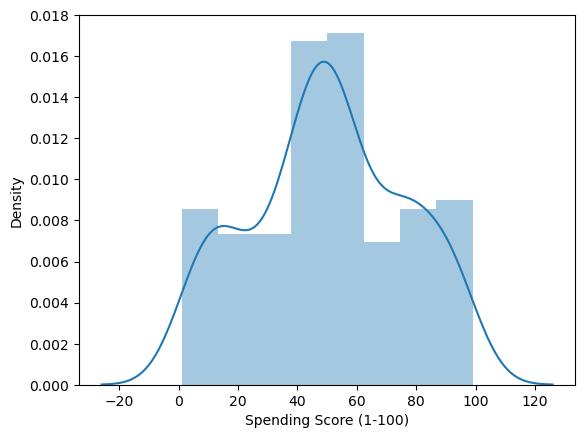

In [6]:
#Visualize all the numerical columns using loops
numerical_Cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in numerical_Cols:
    plt.figure();  #Plot for every columns seperately
    sns.distplot(df[i]);

1. The Age and Annual Income distribution looks like Normal distribution
2. The spending score is high in range between 40-60

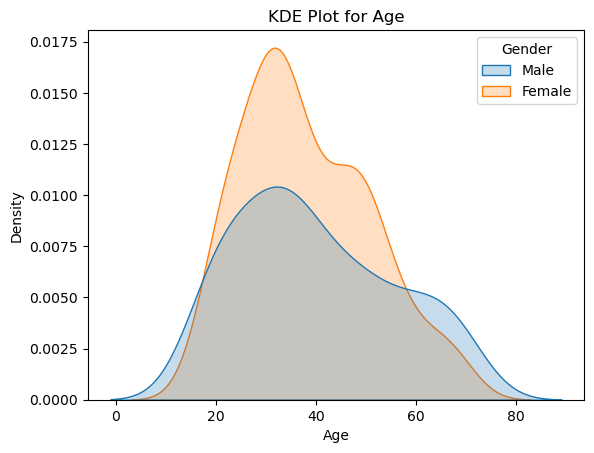

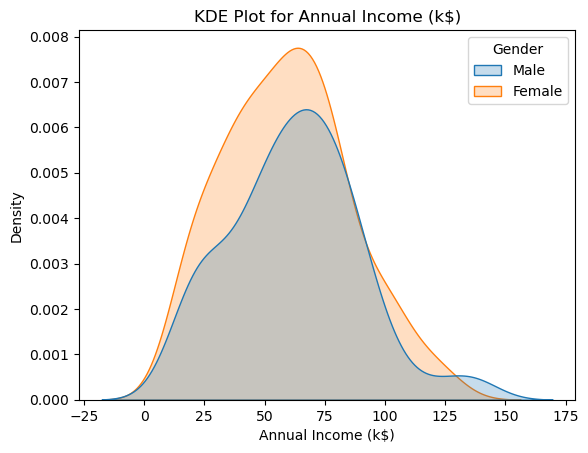

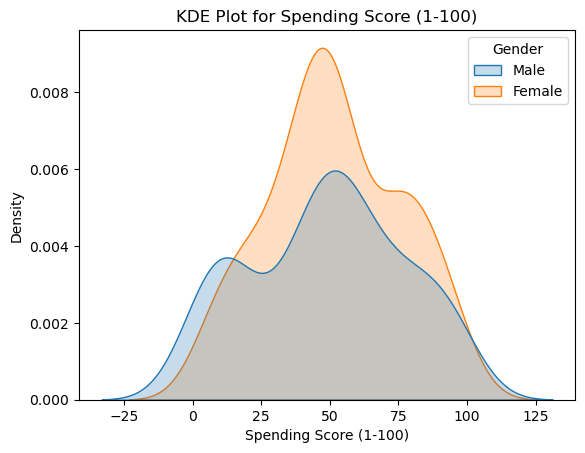

In [7]:
numerical_Cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in numerical_Cols:
    plt.figure();  #Plot for every columns seperately
    sns.kdeplot(data=df, x=i, hue='Gender', shade=True);
    plt.title(f'KDE Plot for {i}')
    plt.show()

1. Age frequency for female between 20-40 is more
2. Female data is more frequent and we can see the outliers at 150-175

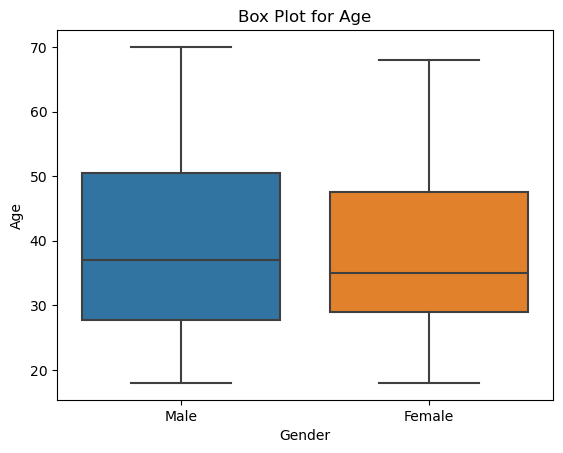

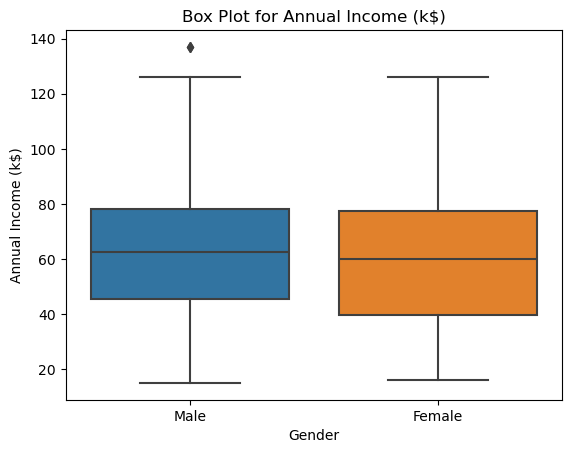

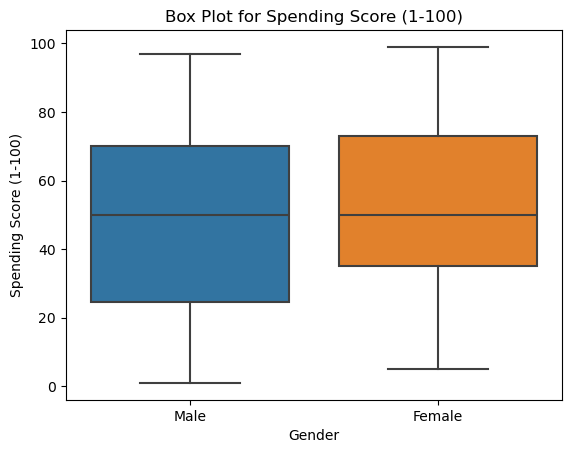

In [8]:
#Boxplot
numerical_Cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in numerical_Cols:
    plt.figure();  #Plot for every columns seperately
    sns.boxplot(data=df, x='Gender', y=df[i]);
    plt.title(f'Box Plot for {i}')
    plt.show()

1. Age - The median is higher for male
2. Income - Outlier is present
3. Spending score is more for male and female even though the median looks similar

In [9]:
#Female count is more
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [10]:
#Get Percentage
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Bivariate Analysis

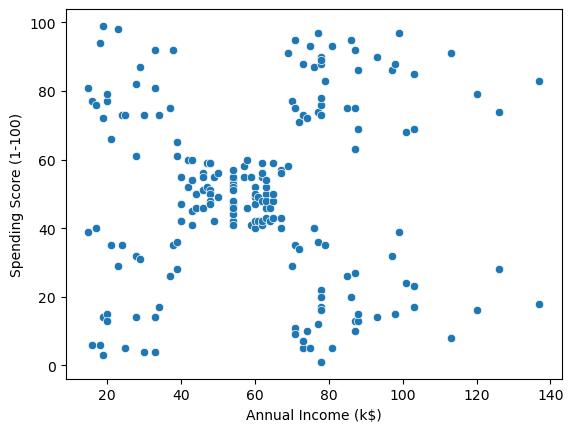

In [11]:
sns.scatterplot(data=df, x='Annual Income (k$)', y= 'Spending Score (1-100)');

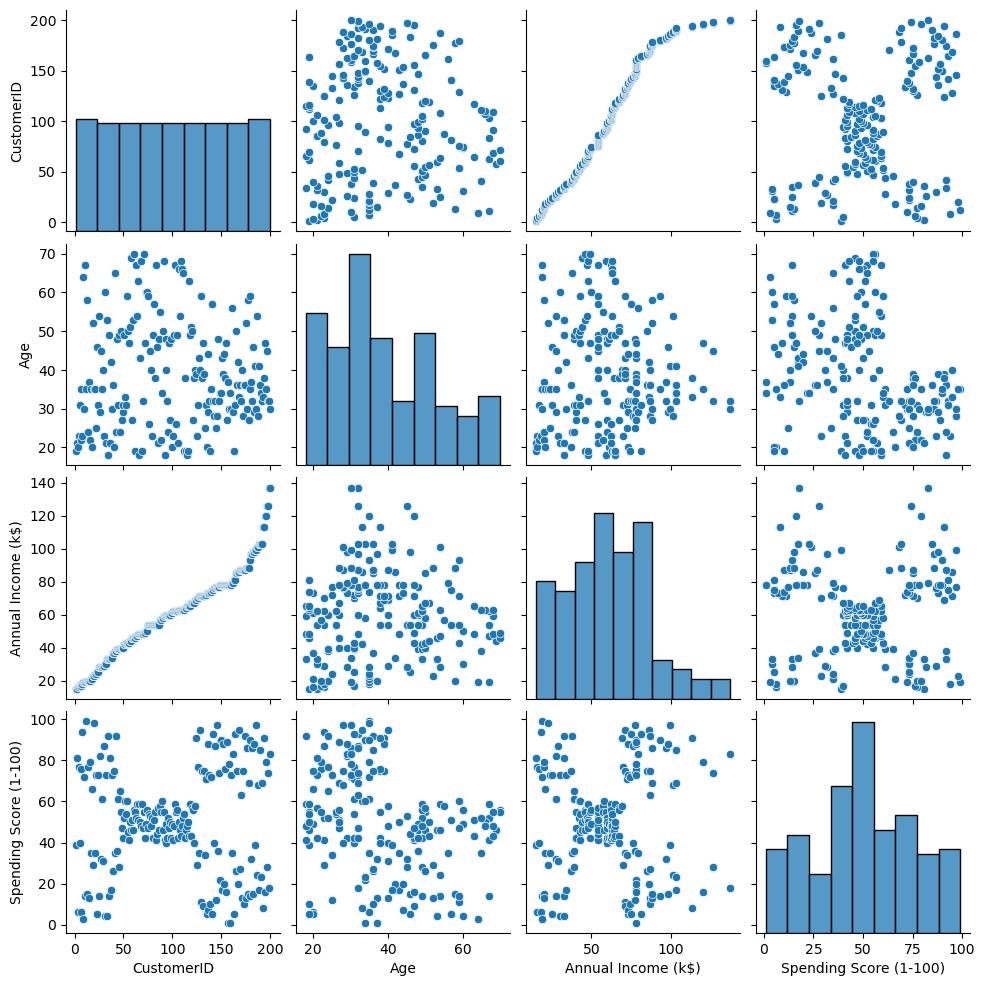

In [12]:
#pair plot
sns.pairplot(df);

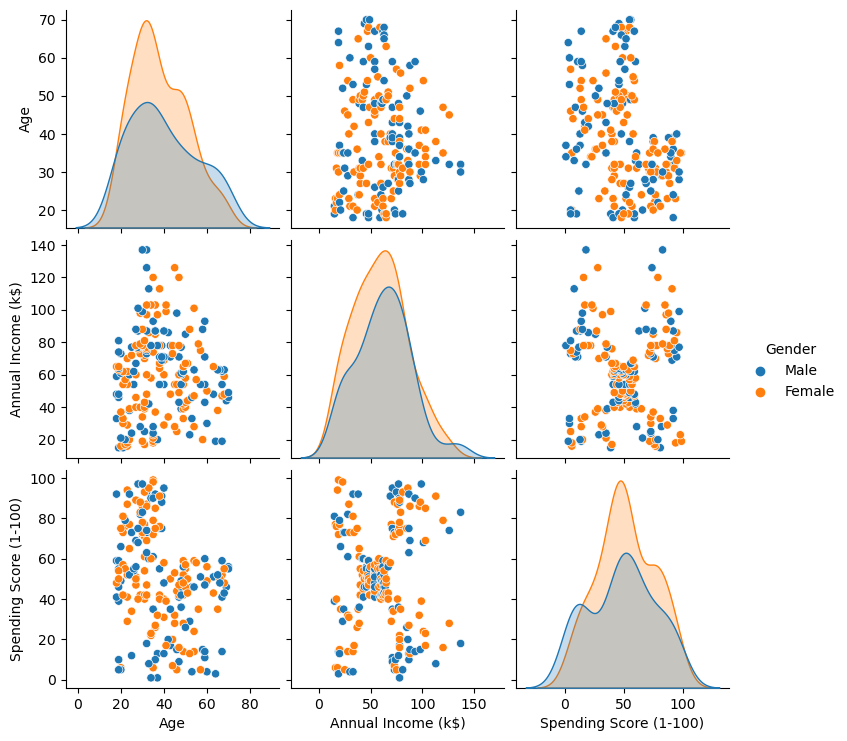

In [13]:
# Customer ID can be dropped as there is no information from the customer id
df1 = df.drop('CustomerID', axis=1) #Axis 0 is row and 1 is column
sns.pairplot(df1, hue='Gender');

In [14]:
grouped_means = df1.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
print(grouped_means)

          Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                   
Female  38.10               59.25                   51.53
Male    39.81               62.23                   48.51


Shopping score of female is higher

In [15]:
df1.select_dtypes(include='number').corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


1. Age with annual income have a negative correlation; similarly, spending score has negative correlation with age

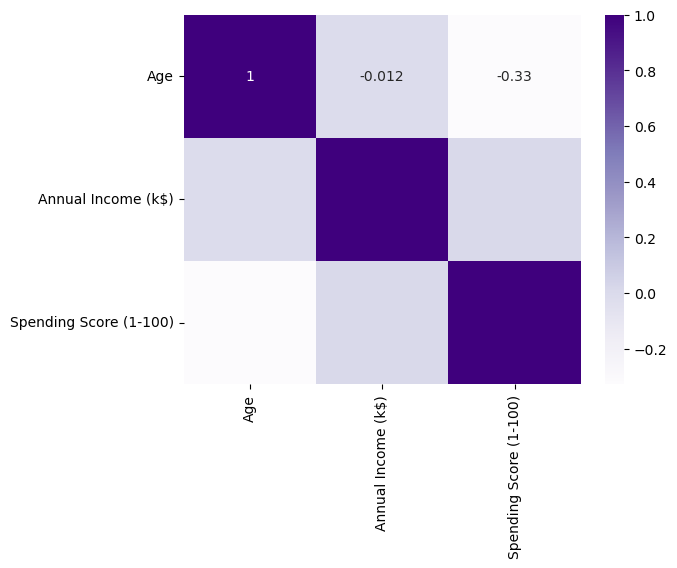

In [16]:
sns.heatmap(df1.select_dtypes(include='number').corr(),annot=True,cmap='Purples');

## Clustering

In [17]:
Cluster1 = KMeans(n_clusters=6)

In [18]:
Cluster1.fit(df1[['Annual Income (k$)']])
#initialized but no parameters

  File "/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


KMeans(n_clusters=6)

In [19]:
Cluster1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [20]:
#add the labels to table df1
df1['Income Cluster'] = Cluster1.labels_
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,3
3,Female,23,16,77,3
4,Female,31,17,40,3


In [21]:
#Summary Stats
df1['Income Cluster'].value_counts()

Income Cluster
5    48
1    42
2    42
3    32
4    28
0     8
Name: count, dtype: int64

In [22]:
#Inertia - Distance between the centroids [Note: Value should be Low]
Cluster1.inertia_

5050.904761904763

In [23]:
#Create a cluster and check the inertia on each one of those clusters to get where we should start our number of clusters

inertia_scores=[] #empty list and add all scores in the list
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

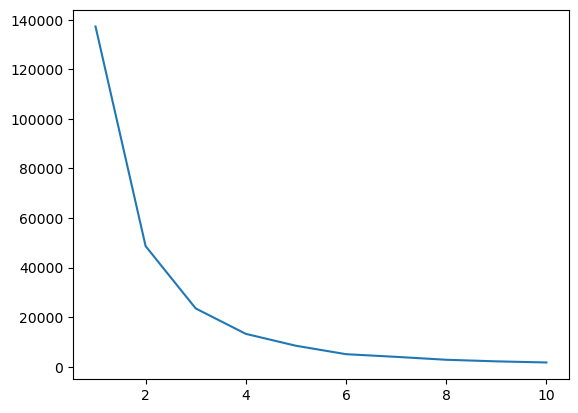

In [24]:
plt.plot(range(1,11),inertia_scores);

In [25]:
#As per the above plot the elbow start nearly at 3 so we can considered 3 clusters


In [26]:
Cluster2 = KMeans(n_clusters=3)

In [27]:
Cluster2.fit(df1[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [28]:
Cluster2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [29]:
#add the labels to table df1
df1['Income Cluster'] = Cluster2.labels_
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [30]:
#Summary Stats
df1['Income Cluster'].value_counts()

Income Cluster
2    90
1    74
0    36
Name: count, dtype: int64

In [31]:
df1.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(3)

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833,99.889,50.639
1,39.500,33.486,50.230
2,38.722,67.089,50.000


In [32]:
#Bivariate Analysis
Cluster3 = KMeans(n_clusters=5) #As per the elbow plot below the cluster bends at around 5, so add 'n_clusters=5'
Cluster3.fit(df1[['Annual Income (k$)', 'Spending Score (1-100)']])
df1['Income and Spending Cluster'] = Cluster3.labels_
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,3
2,Female,20,16,6,1,4
3,Female,23,16,77,1,3
4,Female,31,17,40,1,4


In [33]:
inertia_scores2=[] #empty list and add all scores in the list
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df1[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

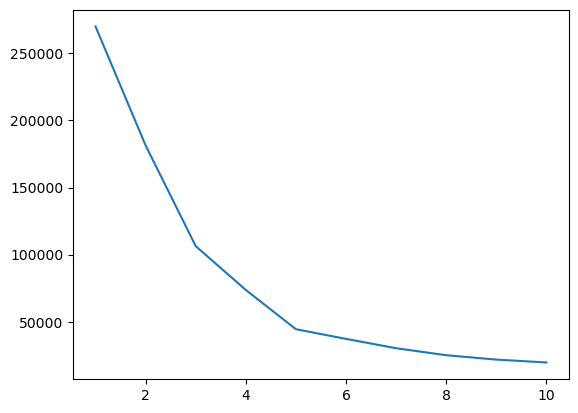

In [34]:
plt.plot(range(1,11),inertia_scores2);

In [41]:
Cluster3.cluster_centers_
#Centers values [x-axis 88 and y-axis 17]

array([[88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

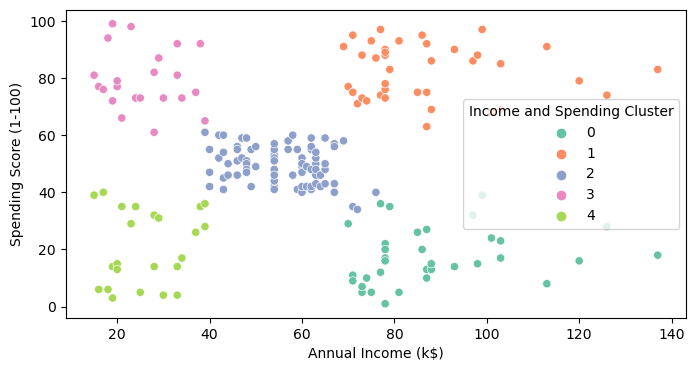

In [35]:
#As per the above plot, the cluster can be considered as 5 as it's bending at around 5
plt.figure(figsize=(8, 4));
sns.scatterplot(data=df1, x='Annual Income (k$)' , y='Spending Score (1-100)', hue='Income and Spending Cluster', 
            palette='Set2');

In [46]:
centers = pd.DataFrame(Cluster3.cluster_centers_)
centers.columns = ['x','y']                   

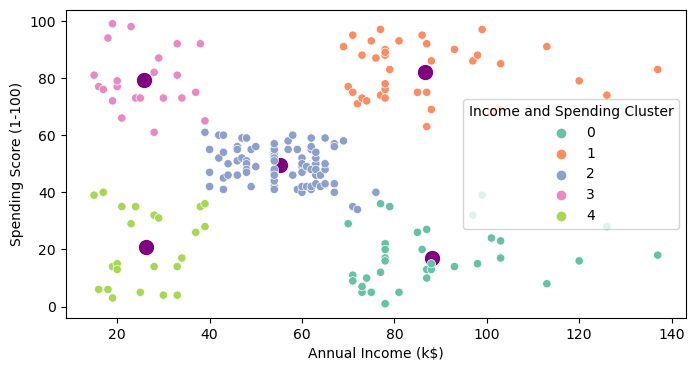

In [55]:
#Centers
plt.figure(figsize=(8, 4));
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='purple',marker='o')
sns.scatterplot(data=df1, x='Annual Income (k$)' , y='Spending Score (1-100)', hue='Income and Spending Cluster', 
            palette='Set2');

In [59]:
pd.crosstab(df1['Income and Spending Cluster'], df['Gender'],normalize='index').round(2)

Gender,Female,Male
Income and Spending Cluster,,
0,0.46,0.54
1,0.54,0.46
2,0.59,0.41
3,0.59,0.41
4,0.61,0.39


In [60]:
#Female dominates #Cluster 2
#Highest spending - cluster4 So this is our target cluster

In [61]:
df1.groupby('Income and Spending Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(3)

,Age,Annual Income (k$),Spending Score (1-100)
Income and Spending Cluster,,,
0,41.114,88.200,17.114
1,32.692,86.538,82.128
2,42.716,55.296,49.519
3,25.273,25.727,79.364
4,45.217,26.304,20.913


In [64]:
# Multivariate Clustering
scale = StandardScaler()

In [66]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,3
2,Female,20,16,6,1,4
3,Female,23,16,77,1,3
4,Female,31,17,40,1,4


In [67]:
#one-hot encoding
df2 = pd.get_dummies(df1, drop_first=True)
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Cluster,Gender_Female,Gender_Male
0,19,15,39,1,4,False,True
1,21,15,81,1,3,False,True
2,20,16,6,1,4,True,False
3,23,16,77,1,3,True,False
4,31,17,40,1,4,True,False


In [68]:
df2.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Income and Spending Cluster', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [69]:
df2 = df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [74]:
df2 = scale.fit_transform(df2)

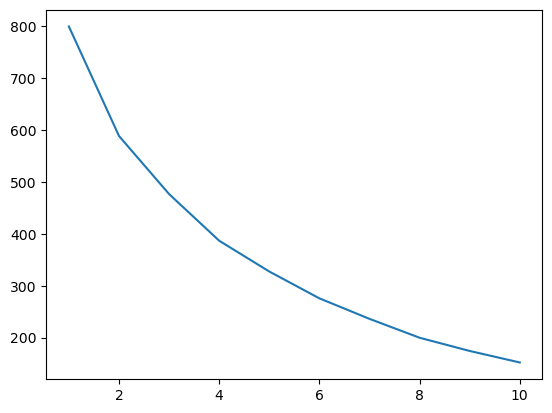

In [75]:
inertia_scores3=[] #empty list and add all scores in the list
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(df2)
    inertia_scores3.append(kmeans3.inertia_)

plt.plot(range(1,11),inertia_scores3);

In [77]:
df1

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,3
2,Female,20,16,6,1,4
3,Female,23,16,77,1,3
4,Female,31,17,40,1,4
...,...,...,...,...,...,...
195,Female,35,120,79,0,1
196,Female,45,126,28,0,0
197,Male,32,126,74,0,1
198,Male,32,137,18,0,0


In [78]:
df1.to_csv('Clustering.csv')

## Analysis of Customer Clusters
Based on our analysis, we should target Cluster 1, as it shows the highest average income and spending per customer. This cluster presents the most significant opportunity for growth.

In Cluster 1, approximately 54% of customers are female. We should develop targeted marketing and advertising campaigns specifically designed to attract and engage this demographic, which represents a key segment of our most profitable customer base.